# lec 4 Use SQL

## review python

In [1]:
demo_str = 'this is my string'

for word_item in demo_str.split():
    print (word_item)

this
is
my
string


In [2]:
print(' {}+{} is {} '.format(1, 2, 1+2))

 1+2 is 3 


## install or import libs

In [1]:
!pip install psycopg2

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas
import configparser
import psycopg2

## establish connection

In [83]:
config=configparser.ConfigParser()
config.read('config.ini')

host= config['myaws']['host']
db= config['myaws']['db']
user= config['myaws']['user']
pwd= config['myaws']['pwd']

In [84]:
conn = psycopg2.connect(
                        host=host,
                        user=user,
                        password=pwd,
                        dbname=db
                        )

In [85]:
cur=conn.cursor()

## query the data

In [38]:
sql_statement ="""
                select bathroom, bedroom 
                from public.house_price
                where bathroom>2
                """

In [33]:
cur.execute(sql_statement)

In [21]:
cur.fetchone()

(4, 5)

In [28]:
for bathroom,bedroom in cur.fetchall()[:10]:
    print(bathroom,bedroom)

4 5
3 3
3 4
5 4
3 3
6 5
6 5
3 3
3 3
4 5


## pandas

In [29]:
import pandas

In [42]:
df=pandas.read_sql_query(sql_statement,conn)

df[:10]

,bathroom,bedroom
0,4,5
1,3,3
2,3,4
3,5,4
4,3,3
5,6,5
6,6,5
7,3,3
8,3,3
9,4,5


In [46]:
sql_avg_price_year = """
                    select built_in,
                    avg(price) as avg_price
                    from public.house_price
                    group by built_in
                    order by built_in
                    """

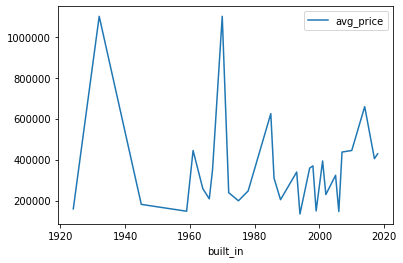

In [47]:
df= pandas.read_sql_query(sql_avg_price_year, conn)

df.plot(x='built_in', y= 'avg_price')

In [50]:
sql_price_area="""
                select price, area
                from public.house_price
                """

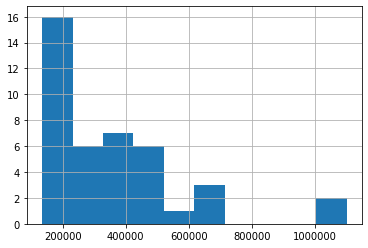

In [52]:
df= pandas.read_sql_query(sql_price_area, conn)

df['price'].hist()

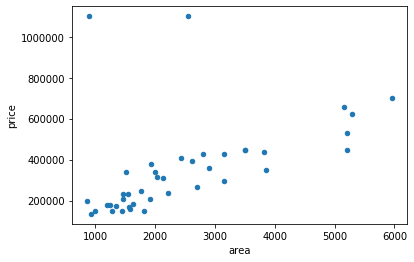

In [54]:
df.plot.scatter(x='area', y='price')

In [57]:
sql_avg_price_house_type= """
                    select house_type,
                    avg(price) as avg_price
                    from public.house_price
                    group by house_type
                    order by avg_price desc
                            """

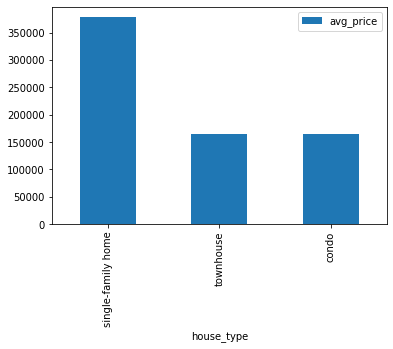

In [59]:
df= pandas.read_sql_query(sql_avg_price_house_type, conn)

df.plot.bar(y='avg_price', x='house_type')

## modify tables

In [98]:
sql_insert= """
            insert into gp24.student(s_email, s_name, major)
            values('{}','{}','{}')
            """.format('s7@jmu.edu', 's7', 'GS')

print (sql_insert)


            insert into gp24.student(s_email, s_name, major)
            values('s7@jmu.edu','s7','GS')
            


In [99]:
cur.execute(sql_insert)

In [92]:
conn.commit()

In [100]:
df=pandas.read_sql_query('select * from gp24.student', conn)

df[-1:]

,s_email,s_name,major
6,s7@jmu.edu,s7,GS


In [95]:
cur.execute('ROLLBACK')

In [101]:
conn.commit()

## close connections

In [102]:
cur.close()
conn.close()